In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./csv/ioport-bogops.csv', delimiter=";")
df['sys+user'] = df['usr_time'] + df['sys_time']
df.head()

,ioport,bogo_ops,real_time,usr_time,sys_time,bogo_ops/s_real,bogo_ops/s_user+sys,CPU_used_per,sys+user
0,1,83045,30.0,26.63,3.45,2768.13,2760.80,100.27,30.08
1,2,162464,30.0,53.56,6.46,5415.44,2706.83,100.03,60.02
2,3,228976,30.0,79.83,10.15,7632.39,2544.74,99.98,89.98
3,4,313657,30.0,106.80,13.18,10455.12,2614.24,99.98,119.98
4,5,359242,30.0,133.51,16.45,11974.64,2395.59,99.97,149.96


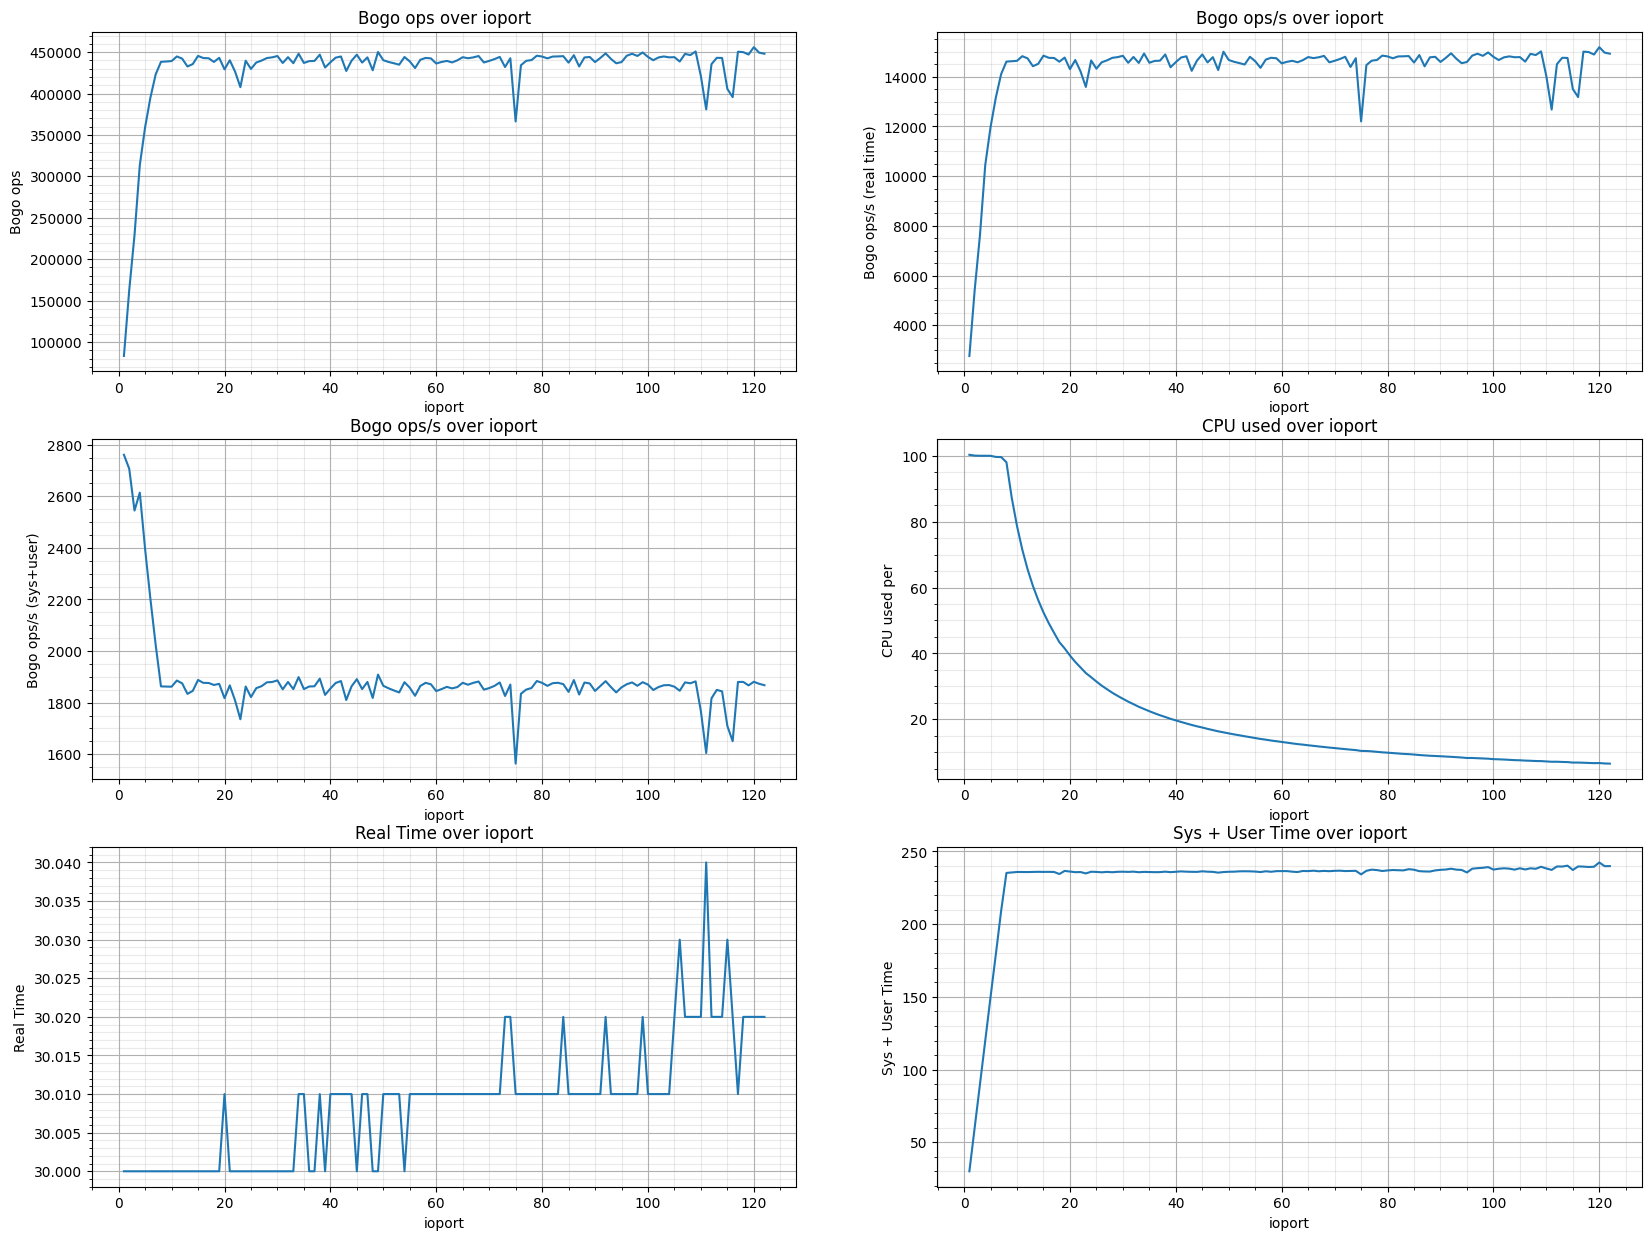

In [4]:
x_column = 'ioport'
fig, axs = plt.subplots(3, 2, figsize=(20,15))

axs[0,0].plot(df[x_column], df['bogo_ops'])
axs[0,0].set_xlabel(x_column)
axs[0,0].set_ylabel('Bogo ops')
axs[0,0].set_title('Bogo ops over ' + x_column)

axs[0,1].plot(df[x_column], df['bogo_ops/s_real'])
axs[0,1].set_xlabel(x_column)
axs[0,1].set_ylabel('Bogo ops/s (real time)')
axs[0,1].set_title('Bogo ops/s over ' + x_column)

axs[1,0].plot(df[x_column], df['bogo_ops/s_user+sys'])
axs[1,0].set_xlabel(x_column)
axs[1,0].set_ylabel('Bogo ops/s (sys+user)')
axs[1,0].set_title('Bogo ops/s over ' + x_column)

axs[1,1].plot(df[x_column], df['CPU_used_per'])
axs[1,1].set_xlabel(x_column)
axs[1,1].set_ylabel('CPU used per')
axs[1,1].set_title('CPU used over ' + x_column)

axs[2,0].plot(df[x_column], df['real_time'])
axs[2,0].set_xlabel(x_column)
axs[2,0].set_ylabel('Real Time')
axs[2,0].set_title('Real Time over ' + x_column)

axs[2,1].plot(df[x_column], df['sys+user'])
axs[2,1].set_xlabel(x_column)
axs[2,1].set_ylabel('Sys + User Time')
axs[2,1].set_title('Sys + User Time over ' + x_column)

for i in range(3):
    for j in range(2):
        axs[i,j].grid(True)
        axs[i,j].minorticks_on()
        axs[i,j].grid(which='minor', linestyle='-', color='#999999', alpha=0.2)

plt.savefig('./image/ioport-bogops.png')
plt.show()

In [52]:
import json
with open('./scripts/ioport-iostat.json', 'r', encoding='utf-8') as file:
    data = json.load(file)
    data = data['sysstat']['hosts'][0]['statistics']
data
array = []
columns = ["timestamp", "r/s", "w/s", "d/s", "f/s", "rkB/s", "wkB/s", "dkB/s", "rrqm/s",
              "wrqm/s", "drqm/s", "rrqm", "wrqm", "drqm", "r_await", "w_await", "d_await",
              "f_await", "rareq-sz", "wareq-sz", "dareq-sz", "aqu-sz", "util"]
for statistic in data:
    if len(statistic['disk']) != 0:
        row = []
        row.append(statistic['timestamp'])
        disk = statistic['disk'][0]
        for column in columns:
            if column != "timestamp":
                row.append(disk[column])
        array.append(row)

df = pd.DataFrame(array, columns=columns)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.head()

,timestamp,r/s,w/s,d/s,f/s,rkB/s,wkB/s,dkB/s,rrqm/s,wrqm/s,...,drqm,r_await,w_await,d_await,f_await,rareq-sz,wareq-sz,dareq-sz,aqu-sz,util
0,2023-11-18 19:01:05,1.71,1.6,0.0,0.23,76.83,52.95,0.0,0.52,1.62,...,0.0,1.02,1.48,0.0,0.23,44.99,33.14,0.0,0.00,0.3
1,2023-11-18 19:01:06,0.00,3.0,0.0,2.00,0.00,20.00,0.0,0.00,2.00,...,0.0,0.00,0.33,0.0,0.00,0.00,6.67,0.0,0.00,0.8
2,2023-11-18 19:01:08,0.00,22.0,0.0,0.00,0.00,100.00,0.0,0.00,3.00,...,0.0,0.00,1.50,0.0,0.00,0.00,4.55,0.0,0.03,0.8
3,2023-11-18 19:01:11,0.00,2.0,0.0,2.00,0.00,28.00,0.0,0.00,5.00,...,0.0,0.00,0.50,0.0,0.50,0.00,14.00,0.0,0.00,0.4
4,2023-11-18 19:01:36,0.00,83.0,0.0,0.00,0.00,420.00,0.0,0.00,2.00,...,0.0,0.00,1.08,0.0,0.00,0.00,5.06,0.0,0.09,2.0


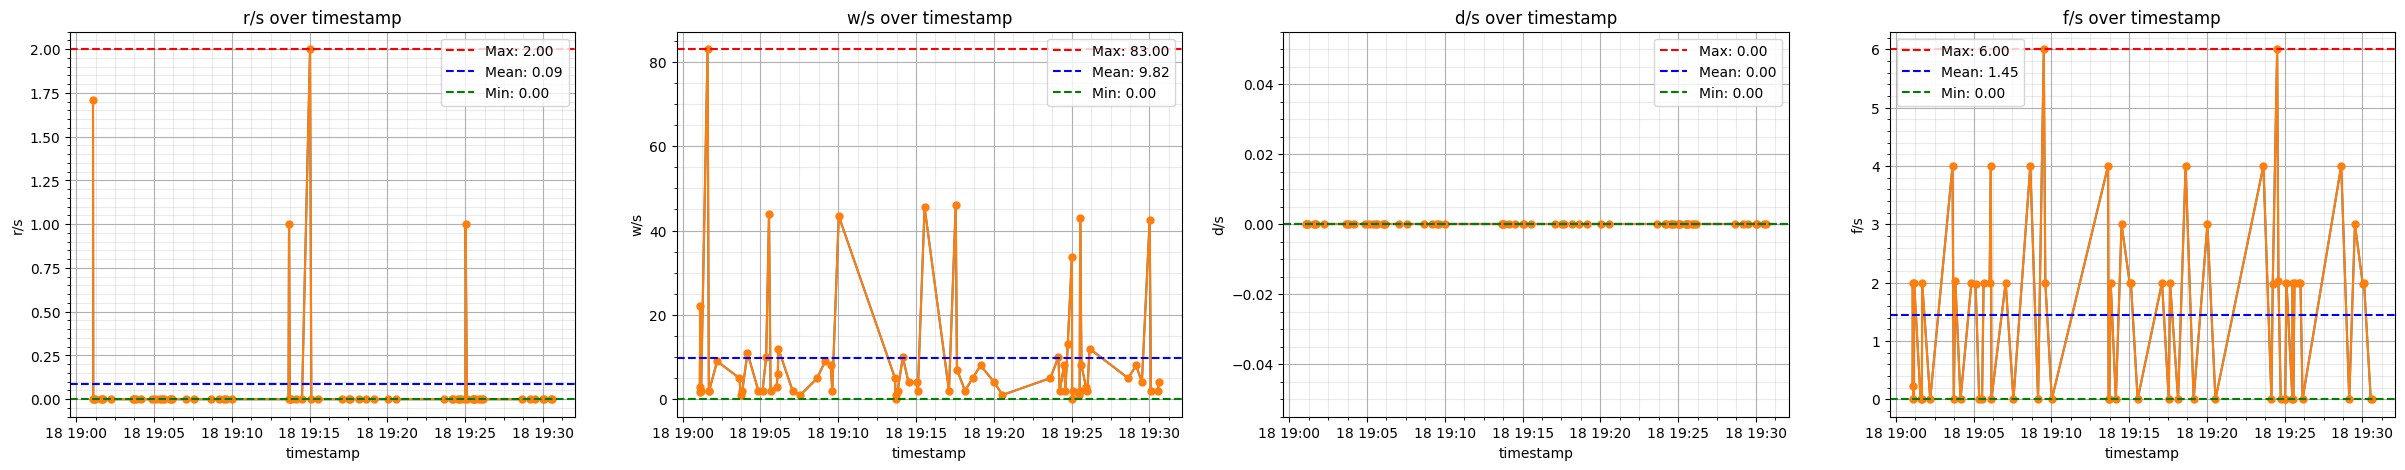

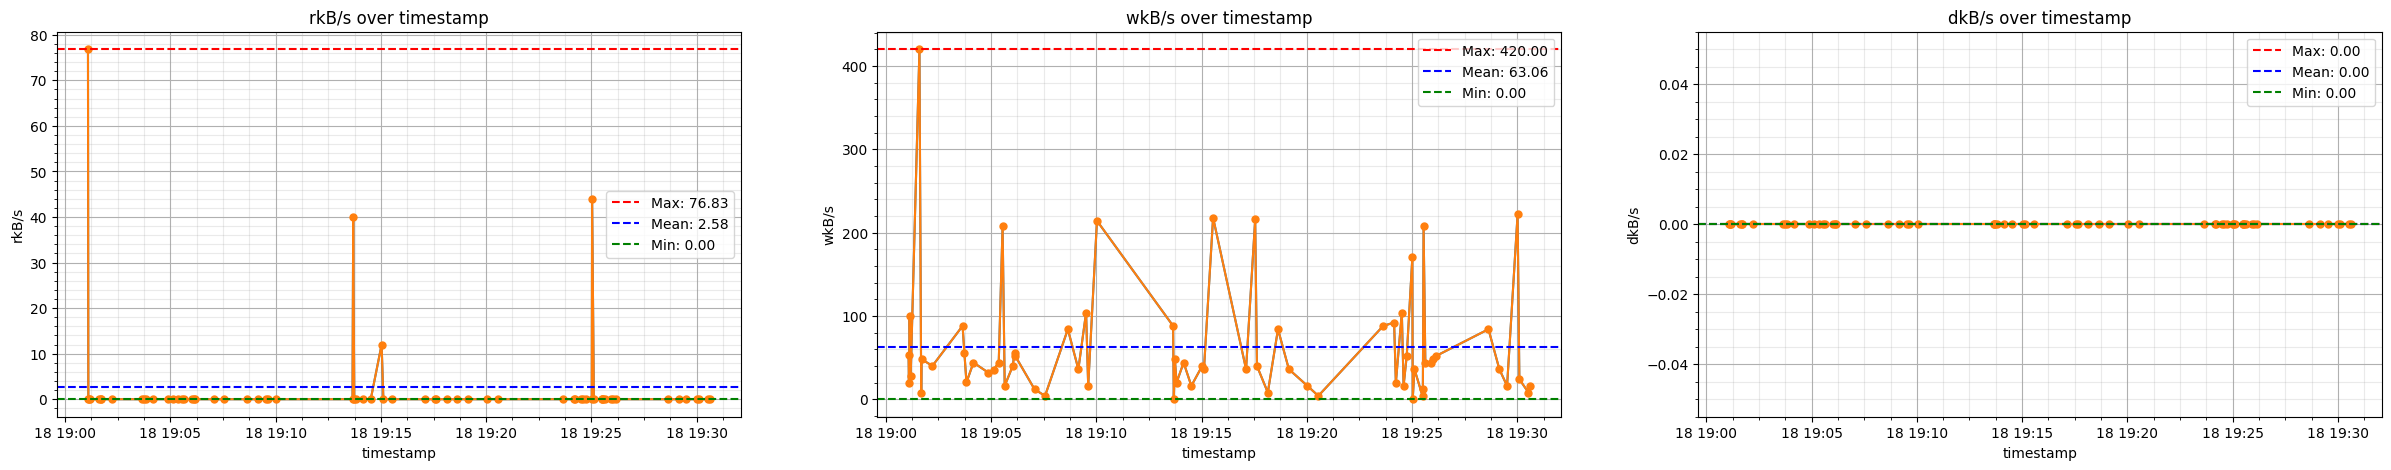

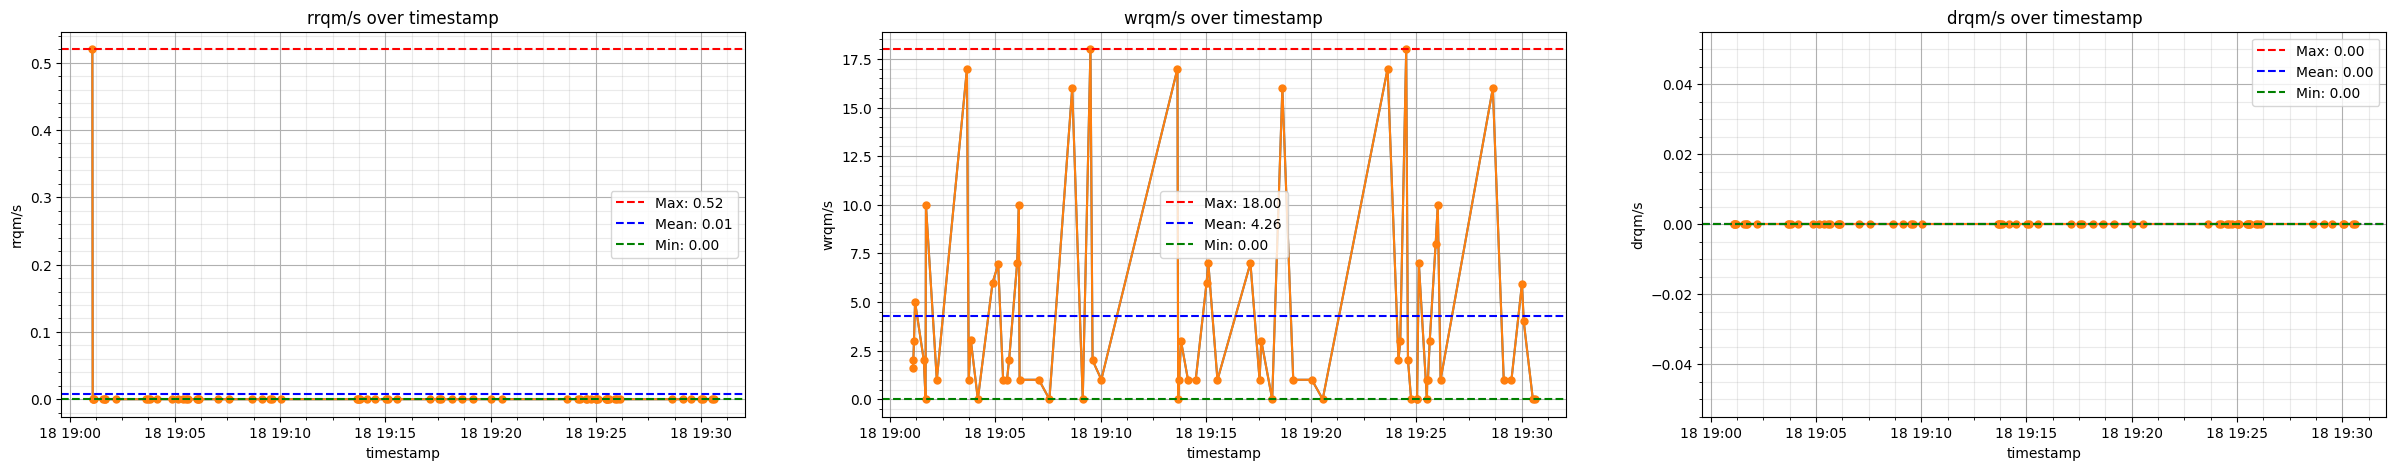

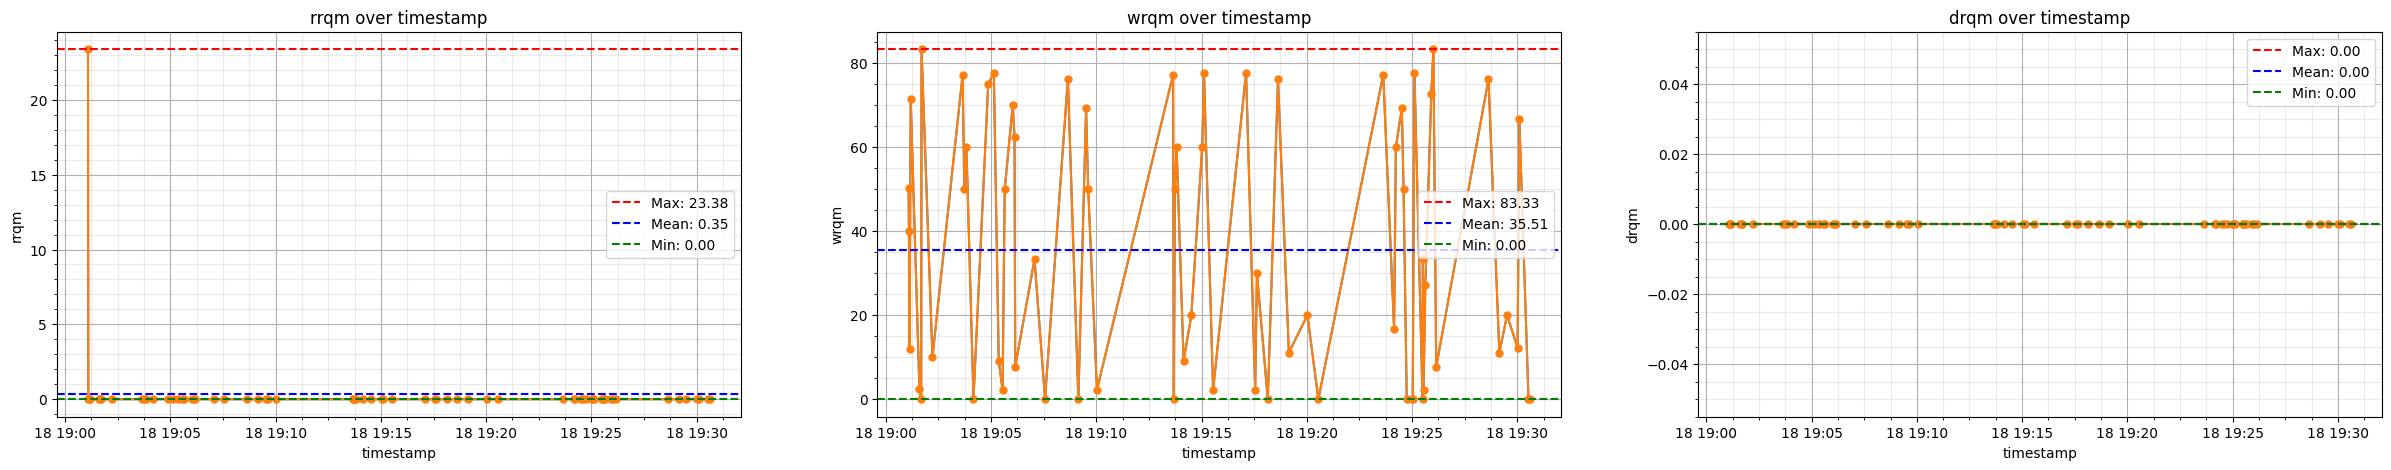

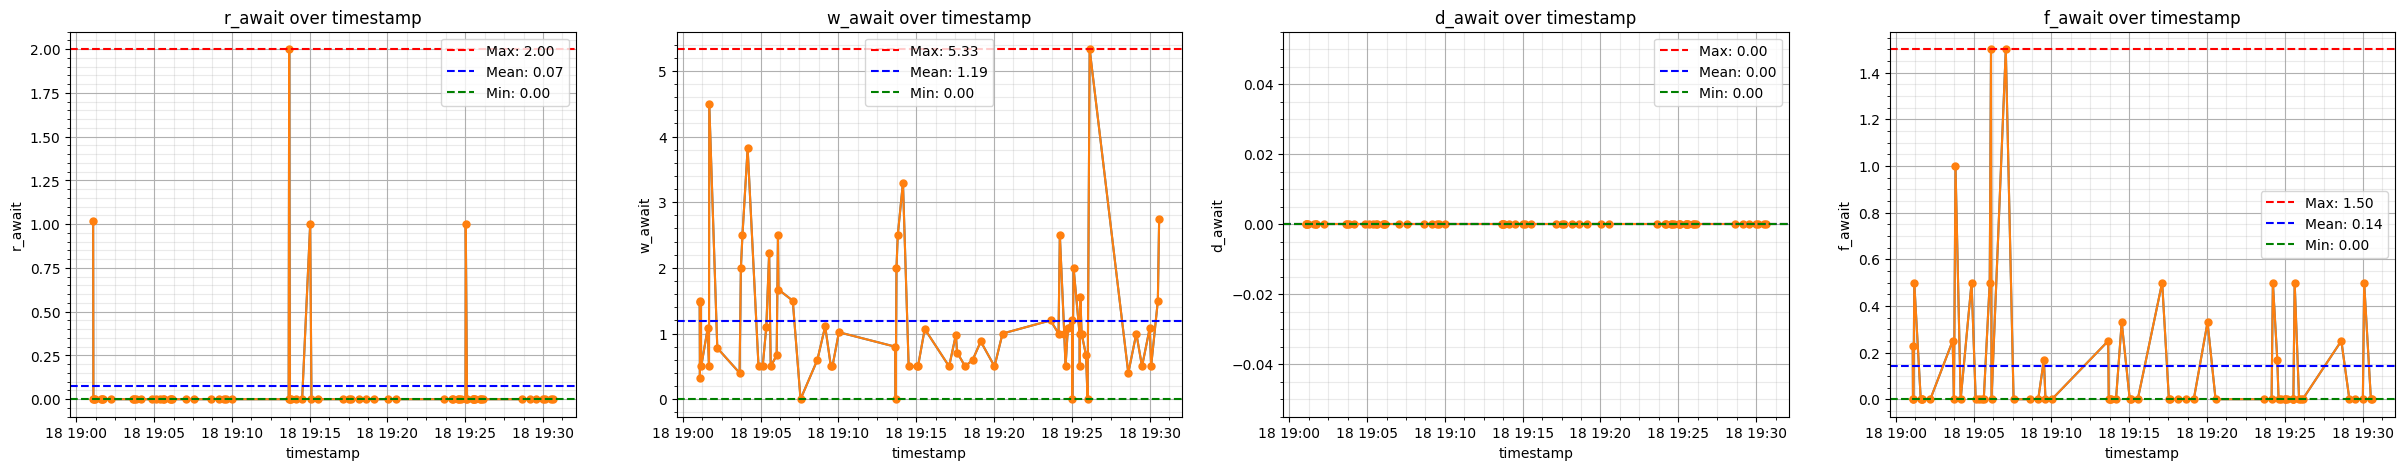

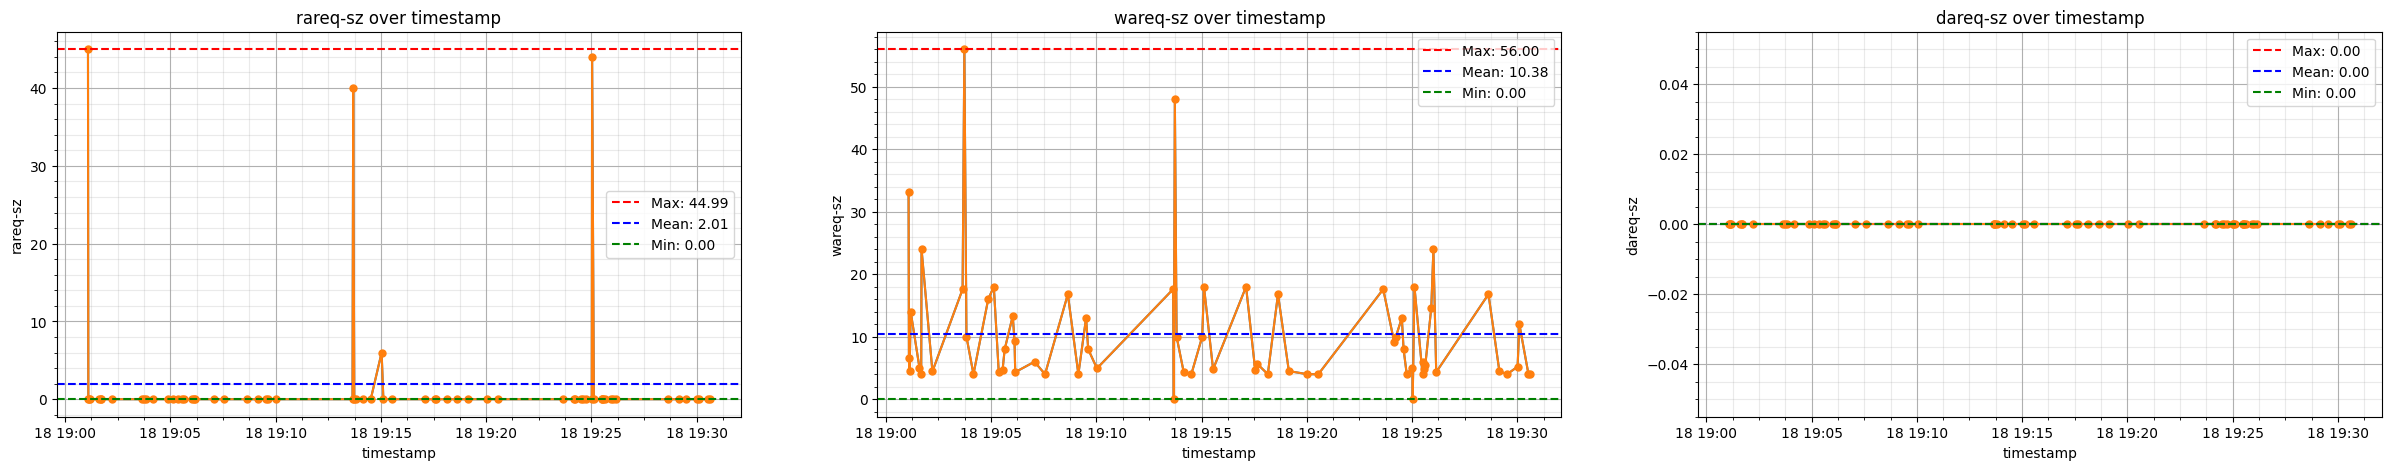

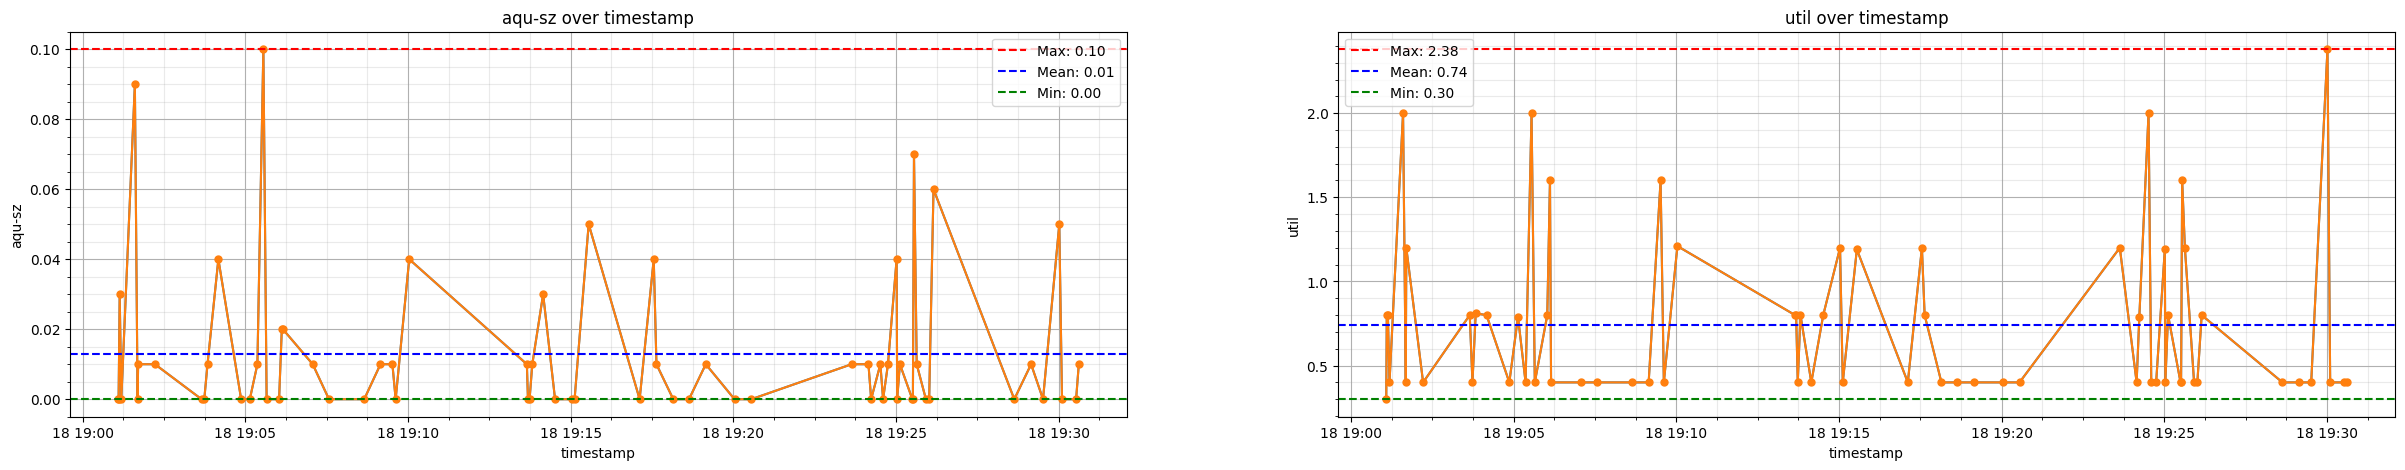

In [60]:
def plot(num, labels, fig):
    means = [df[col].mean() for col in labels]
    mins = [df[col].min() for col in labels]
    maxs = [df[col].max() for col in labels]
    for i in range(num):
        axs[i].plot(df['timestamp'], df[labels[i]])
        axs[i].plot(df['timestamp'], df[labels[i]], marker='.', markersize=10)
        axs[i].set_xlabel('timestamp')
        axs[i].set_ylabel(labels[i])
        axs[i].set_title(labels[i] + ' over timestamp')
        axs[i].axhline(maxs[i], linestyle='--', color='r', label='Max: {:.2f}'.format(maxs[i]))
        axs[i].axhline(means[i], linestyle='--', color='b', label='Mean: {:.2f}'.format(means[i]))
        axs[i].axhline(mins[i], linestyle='--', color='g', label='Min: {:.2f}'.format(mins[i]))
        axs[i].legend()
        axs[i].grid(True)
        axs[i].minorticks_on()
        axs[i].grid(which='minor', linestyle='-', color='#999999', alpha=0.2)
    plt.savefig('./image/iostat_' + str(fig) + '.png')
    plt.show()

fig, axs = plt.subplots(1, 4, figsize=(30,5))
labels = ["r/s", "w/s", "d/s", "f/s"]
plot(4, labels, 1)

fig, axs = plt.subplots(1, 3, figsize=(30,5))   
labels = ["rkB/s", "wkB/s", "dkB/s"]
plot(3, labels,2)

fig, axs = plt.subplots(1, 3, figsize=(30,5))   
labels = ["rrqm/s","wrqm/s", "drqm/s"]
plot(3, labels,3)

fig, axs = plt.subplots(1, 3, figsize=(30,5))   
labels = ["rrqm", "wrqm", "drqm"]
plot(3, labels, 4)

fig, axs = plt.subplots(1, 4, figsize=(30,5))   
labels = ["r_await", "w_await", "d_await","f_await"]
plot(4, labels, 5)

fig, axs = plt.subplots(1, 3, figsize=(30,5))   
labels = ["rareq-sz", "wareq-sz", "dareq-sz"]
plot(3, labels, 6)

fig, axs = plt.subplots(1, 2, figsize=(30,5))   
labels = ["aqu-sz", "util"]
plot(2, labels, 7)



